In [17]:
import numpy as np
import scipy as sc
import numpy.random
from pandas import Series,DataFrame
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import random
from pylab import meshgrid
%matplotlib inline

In [18]:
import warnings
warnings.filterwarnings('ignore')

## Helper Methods

In [19]:
confusion_matrices = []

In [20]:
''' Exploratory Analysis ''' 
def expl(data):
    return print(data.shape), print(data.count()), print(data.columns)

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
class Performance:
    
    @staticmethod
    def get_perf(fit, X, y, y_test, y_pred):
        '''
            this method outputs performance metrics for classification
        '''
        
        # Gets Confusion Matrix
        #conf_matrix = metrics.confusion_matrix(y_true = y, y_pred = y_pred)

        # Gets Accuracy
        accuracy = metrics.accuracy_score(y_true = y_test, y_pred = y_pred)

        # Gets Recall
        # "The recall is intuitively the ability of the classifier to find all the positive samples."
        recall = metrics.recall_score(y_true = y_test, y_pred = y_pred, average='macro')

        # Gets Precision       
        # precision (also called positive predictive value)
        # is the fraction of relevant instances among the retrieved instances
        precision = metrics.precision_score(y_true = y_test, y_pred = y_pred, average='macro')

        # F1
        f1 = metrics.f1_score(y_true = y_test, y_pred = y_pred, average='macro')
        # Cross Validation Score
        cvs = cross_val_score(fit, X, y, cv=10, scoring='accuracy')
        
        return {
                'cross_validation_score': cvs, 
                'accuracy': accuracy,
                'recall': recall,
                'precision': precision,
                'F1': f1
        }

## Dataset Information

In [22]:
# DATA ACQUISITION
# READ DATA FROM THE CSV FILE
df = pd.read_csv('arrhythmia.csv', header=None)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.8+ KB


In [24]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [25]:
expl(df)

(452, 280)
0      452
1      452
2      452
3      452
4      452
5      452
6      452
7      452
8      452
9      452
10     452
11     452
12     452
13     452
14     452
15     452
16     452
17     452
18     452
19     452
20     452
21     452
22     452
23     452
24     452
25     452
26     452
27     452
28     452
29     452
      ... 
250    452
251    452
252    452
253    452
254    452
255    452
256    452
257    452
258    452
259    452
260    452
261    452
262    452
263    452
264    452
265    452
266    452
267    452
268    452
269    452
270    452
271    452
272    452
273    452
274    452
275    452
276    452
277    452
278    452
279    452
Length: 280, dtype: int64
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            270, 271, 272, 273, 274, 275, 276, 277, 278, 279],
           dtype='int64', length=280)


(None, None, None)

In [26]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


([<matplotlib.axis.XTick at 0x7f544f293f28>,
 <a list of 16 Text xticklabel objects>)

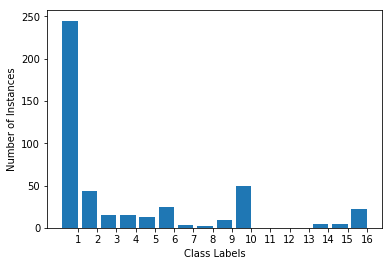

In [27]:
x = np.arange(1,17) #classes
h, bins = np.histogram(y, 16)
plt.bar(x-0.4, h)
plt.xlabel('Class Labels')
plt.ylabel('Number of Instances')
plt.xticks(x)
# we can see that most patients go into the normal range and 
# theres nothing in classes 11-13

## Preprocessing

In [28]:
def na_to_zero(df):
    return df.fillna(0)

In [29]:
def remove_col_13(df):
    return df.drop(13,axis=1)

In [30]:
df.replace(to_replace='?', value=np.nan, inplace=True)
df.fillna(0, inplace=True)

In [31]:
y = df.iloc[ : , -1] # Truth
X = df.iloc[:, :-1]

## Random Forest

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
rfc_pred = rfc.predict(X_test)

In [35]:
rfc_pred

array([ 2,  1,  1,  1,  1,  1,  1,  1, 10,  1,  2,  1,  1, 10,  1,  1,  1,
        1,  1, 10,  3,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  3,  1, 10,
       10,  1,  1,  1,  1, 10,  1,  1,  1, 10,  2,  1,  1,  1,  1,  1,  6,
        1,  1,  1, 10, 10,  2,  1, 10,  9,  1,  1,  1, 10,  1,  1,  1,  1,
        6,  1,  6, 10,  1,  6,  1,  1,  1,  1,  1, 10,  1,  1,  2,  1,  1,
        1,  1,  3,  1,  2,  1,  1,  1,  1,  1,  5,  1,  1,  1,  3,  1,  1,
        1,  6,  1,  1,  4,  1,  1,  2,  1,  1,  2,  1, 10,  2,  3,  1,  1,
        1,  1,  2,  4,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  1])

In [36]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrices.append(confusion_matrix(y_test, rfc_pred, labels=range(1,17))
)
print(classification_report(y_test, rfc_pred))

             precision    recall  f1-score   support

          1       0.71      0.93      0.80        73
          2       0.73      0.67      0.70        12
          3       0.67      0.80      0.73         5
          4       0.50      0.17      0.25         6
          5       1.00      0.14      0.25         7
          6       0.80      0.50      0.62         8
          8       0.00      0.00      0.00         1
          9       1.00      1.00      1.00         1
         10       0.64      0.56      0.60        16
         14       0.00      0.00      0.00         2
         16       0.00      0.00      0.00         5

avg / total       0.67      0.71      0.66       136



In [37]:
rf_perf = Performance()

In [38]:
rf_perf_res = rf_perf.get_perf(rfc, X, y, y_test, rfc_pred)

In [39]:
performance_df = pd.DataFrame.from_dict(rf_perf_res)
performance_df

,cross_validation_score,accuracy,recall,precision,F1
0,0.653846,0.705882,0.433654,0.549557,0.449368
1,0.692308,0.705882,0.433654,0.549557,0.449368
2,0.560000,0.705882,0.433654,0.549557,0.449368
3,0.687500,0.705882,0.433654,0.549557,0.449368
4,0.673913,0.705882,0.433654,0.549557,0.449368
5,0.707317,0.705882,0.433654,0.549557,0.449368
6,0.804878,0.705882,0.433654,0.549557,0.449368
7,0.756098,0.705882,0.433654,0.549557,0.449368
8,0.731707,0.705882,0.433654,0.549557,0.449368
9,0.775000,0.705882,0.433654,0.549557,0.449368


In [40]:
print("Cross Validation Average: {}".format(rf_perf_res['cross_validation_score'].mean()))

Cross Validation Average: 0.7042566889632107


In [41]:
print('Random Forest Train Score: {:.2f}'.format(rfc.score(X_train, y_train)))
print('Random Forest Test Score: {:.2f}'.format(rfc.score(X_test, y_test)))


Random Forest Train Score: 0.98
Random Forest Test Score: 0.71


### Improving Random Forest

In [42]:
# NaNs to mean
df = na_to_zero(df)
df.fillna(df.mean(), inplace=True)
y = df.iloc[ : , -1] 
X = df.iloc[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rf_perf = Performance()
rf_perf_res = rf_perf.get_perf(rfc, X, y, y_test,rfc_pred)
rf_perf_res['cross_validation_score'].mean()

0.7088542975229084

In [43]:
confusion_matrices.append(confusion_matrix(y_test, rfc_pred, labels=range(1,17))
)
print(classification_report(y_test, rfc_pred))

             precision    recall  f1-score   support

          1       0.64      0.95      0.77        65
          2       0.62      0.53      0.57        15
          3       0.86      1.00      0.92         6
          4       0.50      0.67      0.57         3
          5       0.00      0.00      0.00         5
          6       1.00      0.30      0.46        10
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1
          9       1.00      0.33      0.50         6
         10       0.89      0.47      0.62        17
         14       0.00      0.00      0.00         2
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         4

avg / total       0.65      0.67      0.62       136



In [44]:
perf_df = pd.DataFrame.from_dict(rf_perf_res)
perf_df

,cross_validation_score,accuracy,recall,precision,F1
0,0.653846,0.669118,0.327521,0.423122,0.339099
1,0.711538,0.669118,0.327521,0.423122,0.339099
2,0.560000,0.669118,0.327521,0.423122,0.339099
3,0.708333,0.669118,0.327521,0.423122,0.339099
4,0.630435,0.669118,0.327521,0.423122,0.339099
5,0.829268,0.669118,0.327521,0.423122,0.339099
6,0.756098,0.669118,0.327521,0.423122,0.339099
7,0.756098,0.669118,0.327521,0.423122,0.339099
8,0.682927,0.669118,0.327521,0.423122,0.339099
9,0.800000,0.669118,0.327521,0.423122,0.339099


In [45]:
print('Random Forest Train Score: {:.2f}'.format(rfc.score(X_train, y_train)))
print('Random Forest Test Score: {:.2f}'.format(rfc.score(X_test, y_test)))

Random Forest Train Score: 0.98
Random Forest Test Score: 0.67


In [46]:
# removing column 13
df.drop(13, inplace=True)
y = df.iloc[ : , -1] 
X = df.iloc[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rf_perf = Performance()
rf_perf_res = rf_perf.get_perf(rfc, X, y, y_test,rfc_pred)
rf_perf_res['cross_validation_score'].mean()

0.683801751094434

In [47]:
confusion_matrices.append(confusion_matrix(y_test, rfc_pred, labels=range(1,17))
)
print(classification_report(y_test, rfc_pred))

             precision    recall  f1-score   support

          1       0.77      0.96      0.85        76
          2       0.57      0.57      0.57        14
          3       0.80      0.80      0.80         5
          4       0.00      0.00      0.00         7
          5       1.00      0.25      0.40         4
          6       0.80      0.57      0.67         7
          9       0.67      1.00      0.80         2
         10       0.75      0.75      0.75        12
         14       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         8

avg / total       0.66      0.74      0.69       136



In [48]:
print('Random Forest Train Score: {:.2f}'.format(rfc.score(X_train, y_train)))
print('Random Forest Test Score: {:.2f}'.format(rfc.score(X_test, y_test)))


Random Forest Train Score: 0.99
Random Forest Test Score: 0.74


In [49]:
# Imputing the missing data
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
# NaNs to mean
df = na_to_zero(df)
df.fillna(df.mean(), inplace=True)
y = df.iloc[ : , -1] 
X = df.iloc[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
X = imp.fit_transform(X)
# normalize the dataset
sc = StandardScaler()
X = sc.fit_transform(X)
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rf_perf = Performance()
rf_perf_res = rf_perf.get_perf(rfc, X, y, y_test,rfc_pred)
rf_perf_res['cross_validation_score'].mean()


0.6983785178236397

In [50]:
confusion_matrices.append(confusion_matrix(y_test, rfc_pred, labels=range(1,17))
)
print(classification_report(y_test, rfc_pred))

             precision    recall  f1-score   support

          1       0.73      0.90      0.81        83
          2       0.86      0.50      0.63        12
          3       0.75      0.75      0.75         4
          4       1.00      0.20      0.33         5
          5       0.00      0.00      0.00         4
          6       0.25      0.67      0.36         3
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1
          9       1.00      1.00      1.00         1
         10       0.64      0.54      0.58        13
         14       0.00      0.00      0.00         1
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         7

avg / total       0.65      0.70      0.65       136



In [51]:
print('Random Forest Train Score: {:.2f}'.format(rfc.score(X_train, y_train)))
print('Random Forest Test Score: {:.2f}'.format(rfc.score(X_test, y_test)))


Random Forest Train Score: 1.00
Random Forest Test Score: 0.70


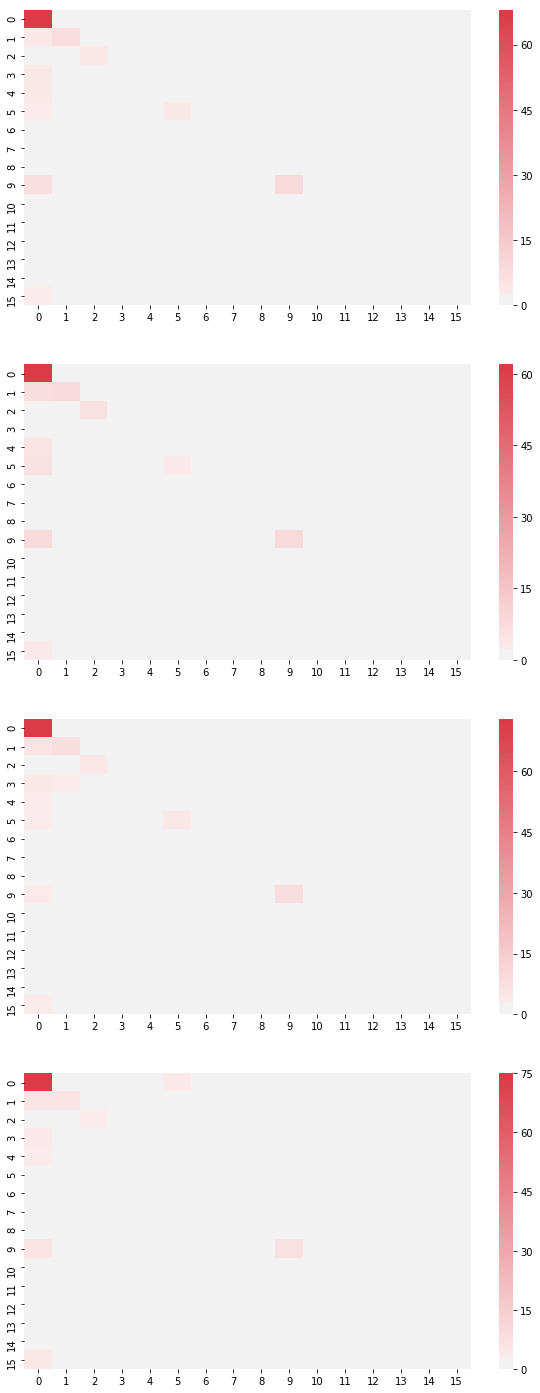

In [52]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(10,25))
for i in range(len(confusion_matrices)):
    plt.subplot(len(confusion_matrices), 1, i+1)
    sns.heatmap(confusion_matrices[i], cmap=cmap, center=0,)

# Sub Sampling Data for Random Forest

## Naive Bayes Classifier

In [53]:
# Reset data
df = pd.read_csv('arrhythmia.csv', header=None)
df.replace(to_replace='?', value=np.nan, inplace=True)
df.fillna(0, inplace=True)
y = df.iloc[ : , -1] # Truth
X = df.iloc[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [54]:
from sklearn.naive_bayes import BernoulliNB
naive_bayes = BernoulliNB()
naive_bayes.fit(X_train, y_train)
y_train_nb = naive_bayes.predict(X_train)
y_pred_nb = naive_bayes.predict(X_test)
y_train_nb

array([ 1,  2,  4, 10,  1,  1,  1,  1, 16,  1,  1,  1,  1,  1,  1,  1, 10,
        1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  2, 10,  1,  1,
        1,  3, 10,  4,  1,  9,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1, 10,
        1,  1,  1, 15,  2, 10,  9, 10, 16,  1,  1, 10,  1,  2,  1,  1,  1,
        1,  1,  6,  2,  1,  3,  1,  1,  2,  1,  1,  1,  1, 16,  9,  9,  1,
        1,  1,  3, 10,  1,  1,  1,  1,  1,  1,  1,  1,  1, 10,  1,  1,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  3,  2,  1, 10,  3,  1,
        1,  1,  9,  1,  2,  1,  1,  1,  9,  1,  1,  2,  1, 10,  1,  1,  1,
       10,  1,  1, 10,  1,  1,  2,  1,  1,  1,  1,  1,  1, 10,  1,  6, 10,
        1, 10,  2,  6,  1,  1,  1,  2,  1,  1,  1,  2,  1,  1,  1,  1,  1,
        1,  2,  2,  1,  1,  1,  1,  3, 10,  1,  1,  6,  1,  1,  1,  1,  1,
       10,  1,  3,  1, 10,  1,  1,  1,  1, 10,  1,  1,  1,  1,  1,  1,  1,
        1,  4, 16,  1, 16,  1,  1,  1,  1,  1,  1,  1,  1, 16,  1,  4,  1,
        1,  1,  1, 10,  1

In [55]:
nb_performance = Performance()
nb_performance.get_perf(naive_bayes, X, y, y_test, y_pred_nb)
nb_performance_df = pd.DataFrame.from_dict(nb_performance.get_perf(naive_bayes, X, y, y_test, y_pred_nb))
nb_performance_df

,cross_validation_score,accuracy,recall,precision,F1
0,0.576923,0.661765,0.303684,0.382465,0.318778
1,0.653846,0.661765,0.303684,0.382465,0.318778
2,0.500000,0.661765,0.303684,0.382465,0.318778
3,0.645833,0.661765,0.303684,0.382465,0.318778
4,0.695652,0.661765,0.303684,0.382465,0.318778
5,0.707317,0.661765,0.303684,0.382465,0.318778
6,0.707317,0.661765,0.303684,0.382465,0.318778
7,0.682927,0.661765,0.303684,0.382465,0.318778
8,0.682927,0.661765,0.303684,0.382465,0.318778
9,0.800000,0.661765,0.303684,0.382465,0.318778


In [56]:
print(nb_performance.get_perf(naive_bayes, X, y, y_test, y_pred_nb)['cross_validation_score'].mean())

0.6652742542893655


## Improving Naive Bayes

## K-NN Classifier

In [57]:
# Reset data
confusion_matrices = []
df = pd.read_csv('arrhythmia.csv', header=None)
df.replace(to_replace='?', value=np.nan, inplace=True)
df.fillna(0, inplace=True)
y = df.iloc[ : , -1] # Truth
X = df.iloc[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)
pred = neigh.predict(X_test)
confusion_matrices.append(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          1       0.70      0.92      0.79        84
          2       0.43      0.21      0.29        14
          3       1.00      1.00      1.00         2
          4       0.67      0.40      0.50         5
          5       0.00      0.00      0.00         4
          6       0.00      0.00      0.00         7
          9       1.00      1.00      1.00         2
         10       0.50      0.25      0.33        12
         15       0.00      0.00      0.00         2
         16       0.00      0.00      0.00         4

avg / total       0.57      0.65      0.60       136



In [59]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

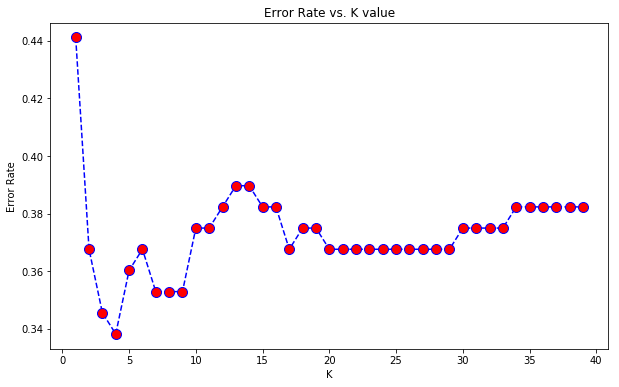

In [60]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K value')
plt.xlabel('K')
plt.ylabel('Error Rate')
# best k is 7

In [61]:
# K = 7
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
confusion_matrices.append(confusion_matrix(y_test, pred))
print('WITH K=7')
print('\n')
print(classification_report(y_test,pred))

WITH K=7


             precision    recall  f1-score   support

          1       0.67      0.93      0.78        84
          2       0.22      0.14      0.17        14
          3       1.00      0.50      0.67         2
          4       1.00      0.40      0.57         5
          5       0.00      0.00      0.00         4
          6       0.00      0.00      0.00         7
          9       1.00      0.50      0.67         2
         10       0.43      0.25      0.32        12
         15       0.00      0.00      0.00         2
         16       0.00      0.00      0.00         4

avg / total       0.54      0.64      0.57       136



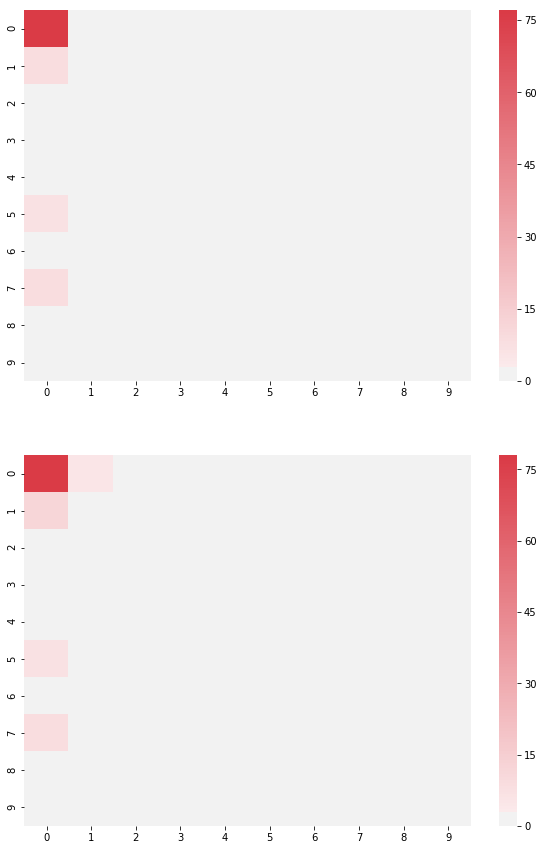

In [62]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(10,15))
for i in range(len(confusion_matrices)):
    plt.subplot(len(confusion_matrices), 1, i+1)
    sns.heatmap(confusion_matrices[i], cmap=cmap, center=0,)

## Logistic Regression

In [63]:
# Reset data
confusion_matrices = []
df = pd.read_csv('arrhythmia.csv', header=None)
df.replace(to_replace='?', value=np.nan, inplace=True)
df.fillna(0, inplace=True)
y = df.iloc[ : , -1] # Truth
X = df.iloc[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [64]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve, KFold

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)
print('Logistic Regression Train Score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Logistic Regression Test Score: {:.2f}'.format(lr.score(X_test, y_test)))

lr = LogisticRegression(C=0.5)
lr.fit(X_train, y_train)
y_train_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)
print('Logistic Regression (C=0.5) Train Score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Logistic Regression (C=0.5) Test Score: {:.2f}'.format(lr.score(X_test, y_test)))

lr = LogisticRegression(C=0.1)
lr.fit(X_train, y_train)
y_train_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)
print('Logistic Regression (C=0.1) Train Score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Logistic Regression (C=0.1) Test Score: {:.2f}'.format(lr.score(X_test, y_test)))


Logistic Regression Train Score: 1.00
Logistic Regression Test Score: 0.60
Logistic Regression (C=0.5) Train Score: 1.00
Logistic Regression (C=0.5) Test Score: 0.58
Logistic Regression (C=0.1) Train Score: 1.00
Logistic Regression (C=0.1) Test Score: 0.60


## Decision Tree Testing

In [65]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.95, min_df=2, max_features=10000)
df = pd.read_csv('arrhythmia.csv', header=None)
df.replace(to_replace='?', value=np.nan, inplace=True)
df.fillna(0, inplace=True)
y = df.iloc[ : , -1] # Truth
X = df.iloc[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

#X_vec = cv.fit_transform(X)

# Decision Tree

In [66]:
# Reset data
confusion_matrices = []
df = pd.read_csv('arrhythmia.csv', header=None)
df.replace(to_replace='?', value=np.nan, inplace=True)
df.fillna(0, inplace=True)
y = df.iloc[ : , -1] # Truth
X = df.iloc[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dtree = DecisionTreeClassifier()

In [69]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [70]:
predictions = dtree.predict(X_test)

In [71]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          1       0.80      0.75      0.78        69
          2       0.47      0.56      0.51        16
          3       1.00      0.33      0.50         6
          4       0.25      0.25      0.25         4
          5       0.50      0.33      0.40         3
          6       0.67      0.57      0.62         7
          8       0.00      0.00      0.00         0
          9       1.00      1.00      1.00         3
         10       0.60      0.79      0.68        19
         14       0.00      0.00      0.00         1
         15       0.00      0.00      0.00         2
         16       0.00      0.00      0.00         6

avg / total       0.66      0.64      0.64       136



In [72]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

ModuleNotFoundError: No module named 'pydot'

In [ ]:
#/home/saber/anaconda3/envs/machinelearning/lib/python3.7/site-packages